In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob

# IncomeGroup WorldWide Analysis 

In [8]:
country = pd.read_csv('/Users/ruiqizhang/Downloads/world-development-indicators/Country.csv')
country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [13]:
#clear the data
country.IncomeGroup.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [21]:
country.Region.unique()

array(['South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'Sub-Saharan Africa',
       'Latin America & Caribbean', nan, 'North America'], dtype=object)

In [15]:
country_array =  country[['ShortName','CountryCode']].drop_duplicates().values

In [55]:
df_country = country[pd.notnull(country['Region'])]

In [56]:
df_country.Region.unique()
df_country.IncomeGroup.unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [149]:
China = df_country.loc[df_country['ShortName']==('China')]
China

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
42,CHN,China,China,People's Republic of China,CN,Chinese yuan,On 1 July 1997 China resumed its exercise of s...,East Asia & Pacific,Upper middle income,CN,...,Consolidated central government,General Data Dissemination System (GDDS),2010,National Sample Survey on Population Change (N...,"Integrated household survey (IHS), 2012",NaN,2007,2007.0,2013.0,2005.0


In [70]:
df=df_country[['Region','IncomeGroup']]
df.head()

,Region,IncomeGroup
0,South Asia,Low income
1,Europe & Central Asia,Upper middle income
2,Middle East & North Africa,Upper middle income
3,East Asia & Pacific,Upper middle income
4,Europe & Central Asia,High income: nonOECD


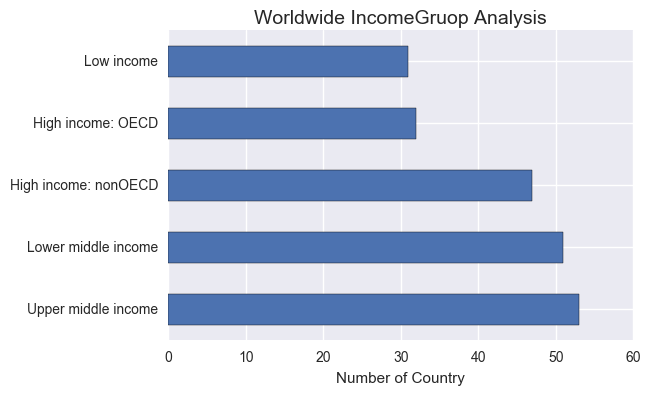

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
df.IncomeGroup.value_counts().plot(kind='barh')
plt.title('Worldwide IncomeGruop Analysis',fontsize = 14)
plt.xlabel('Number of Country')
plt.savefig('A1_1.png')

In [72]:
df.groupby(["Region", "IncomeGroup"]).size()

Region                      IncomeGroup         
East Asia & Pacific         High income: OECD        4
                            High income: nonOECD     8
                            Low income               2
                            Lower middle income     12
                            Upper middle income     10
Europe & Central Asia       High income: OECD       24
                            High income: nonOECD    13
                            Lower middle income      8
                            Upper middle income     12
Latin America & Caribbean   High income: OECD        1
                            High income: nonOECD    16
                            Low income               1
                            Lower middle income      6
                            Upper middle income     17
Middle East & North Africa  High income: OECD        1
                            High income: nonOECD     7
                            Lower middle income      6
                

In [134]:
result = df.groupby(["Region", "IncomeGroup"]).size().reset_index(name="number_country")
result

,Region,IncomeGroup,number_country
0,East Asia & Pacific,High income: OECD,4
1,East Asia & Pacific,High income: nonOECD,8
2,East Asia & Pacific,Low income,2
3,East Asia & Pacific,Lower middle income,12
4,East Asia & Pacific,Upper middle income,10
5,Europe & Central Asia,High income: OECD,24
6,Europe & Central Asia,High income: nonOECD,13
7,Europe & Central Asia,Lower middle income,8
8,Europe & Central Asia,Upper middle income,12
9,Latin America & Caribbean,High income: OECD,1


In [114]:
Ep = result.loc[result['Region']==('East Asia & Pacific')]
Ep

,Region,IncomeGroup,number_country
0,East Asia & Pacific,High income: OECD,4
1,East Asia & Pacific,High income: nonOECD,8
2,East Asia & Pacific,Low income,2
3,East Asia & Pacific,Lower middle income,12
4,East Asia & Pacific,Upper middle income,10


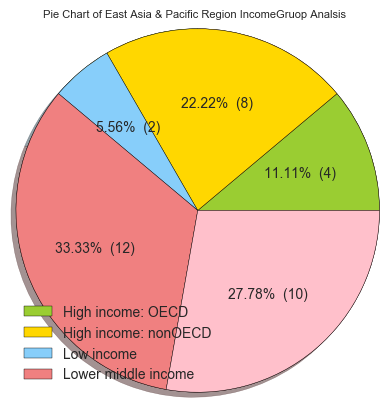

In [224]:
from matplotlib.pyplot import pie, axis, show
plt.figure(figsize=plt.figaspect(1))
labels = ['High income: OECD', 'High income: nonOECD', 'Low income', 'Lower middle income','Upper middle income']
values = [4, 8, 2, 12,10]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','pink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90,)
plt.pie(values,autopct=make_autopct(values),colors=colors)
plt.legend(patches, labels, loc="best")
plt.tight_layout()
plt.axis('equal')
plt.title('Pie Chart of East Asia & Pacific Region IncomeGruop Analsis ',fontsize = 8)
#plt.show()
plt.savefig('A1_3.png')

In [130]:
low = result.loc[result['IncomeGroup']==('Low income')]
low

,Region,IncomeGroup,number_country
2,East Asia & Pacific,Low income,2
11,Latin America & Caribbean,Low income,1
20,South Asia,Low income,2
24,Sub-Saharan Africa,Low income,26


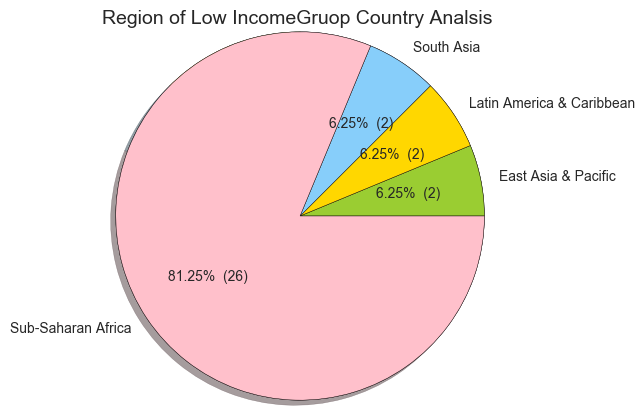

In [229]:
import matplotlib.pyplot as plt

plt.figure(figsize=plt.figaspect(1))
values = [2, 2, 2, 26] 
labels = ['East Asia & Pacific', 'Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa'] 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
colors = ['yellowgreen', 'gold', 'lightskyblue', 'pink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.pie(values, labels=labels, autopct=make_autopct(values),colors=colors)
#plt.legend(patches, labels, loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Region of Low IncomeGruop Country Analsis ',fontsize = 14)
#plt.show()
plt.savefig('A1_2.png')